In [1]:
import pandas as pd

In [2]:
# считаем описание данных
df = pd.read_csv('./data/02_otp_desc.csv', sep=';')

In [3]:
df = df.loc[:, "ПОЛЕ":"ОПИСАНИЕ"]

# в pole Series как из него вытащить строку
for idx, pole in df.iterrows():
    print(pole.get_values())

['AGREEMENT_RK' 'уникальный идентификатор объекта в выборке']
['TARGET'
 'целевая переменная:отклик на маркетинговую кампанию (1 - отклик был зарегистрирован, 0 - отклика не было)']
['AGE' 'возраст клиента']
['SOCSTATUS_WORK_FL'
 'социальный статус клиента относительно работы (1 - работает, 0 - не работает)']
['SOCSTATUS_PENS_FL'
 'социальный статус клиента относительно пенсии (1 - пенсионер, 0 - не пенсионер)']
['GENDER' 'пол клиента']
['CHILD_TOTAL' 'количество детей клиента']
['DEPENDANTS' 'количество иждивенцев клиента']
['EDUCATION' 'образование']
['MARITAL_STATUS' 'семейное положение']
['GEN_INDUSTRY' 'отрасль работы клиента']
['GEN_TITLE' 'должность']
['ORG_TP_STATE' 'форма собственности компании']
['ORG_TP_FCAPITAL' 'отношение к иностранному капиталу']
['JOB_DIR' 'направление деятельности в нутри компании']
['FAMILY_INCOME' 'семейный доход (несколько категорий)']
['PERSONAL_INCOME' 'личный доход клиента (в рублях)']
['REG_ADDRESS_PROVINCE' 'область регистрации клиента']
['FACT_

In [4]:
# считаем все-все данные
train = pd.read_csv('./data/02_otp_train.csv', sep=';')

In [5]:
train.shape

(15223, 52)

In [6]:
test = pd.read_csv('./data/02_otp_test.csv', sep=';')

In [7]:
test.head()

,AGREEMENT_RK,AGE,SOCSTATUS_WORK_FL,SOCSTATUS_PENS_FL,GENDER,CHILD_TOTAL,DEPENDANTS,EDUCATION,MARITAL_STATUS,GEN_INDUSTRY,...,REG_PHONE_FL,GEN_PHONE_FL,LOAN_NUM_TOTAL,LOAN_NUM_CLOSED,LOAN_NUM_PAYM,LOAN_DLQ_NUM,LOAN_MAX_DLQ,LOAN_AVG_DLQ_AMT,LOAN_MAX_DLQ_AMT,PREVIOUS_CARD_NUM_UTILIZED
0,59909969,30,1,0,1,1,1,Среднее специальное,Не состоял в браке,Образование,...,0,1,2,2,8,0,0,0,0,NaN
1,59910420,48,0,1,1,0,0,Среднее,Состою в браке,NaN,...,0,0,2,1,15,0,0,0,0,NaN
2,59911223,35,1,0,0,1,0,Среднее,Не состоял в браке,Металлургия/Промышленность/Машиностроение,...,0,1,1,1,1,0,0,0,0,NaN
3,59911322,22,1,0,0,0,0,Среднее,Не состоял в браке,Другие сферы,...,0,1,3,2,9,0,0,0,0,NaN
4,59911438,27,1,0,1,2,2,Высшее,Состою в браке,Образование,...,0,1,1,1,5,0,0,0,0,NaN


In [8]:
test.shape

(14910, 51)

In [9]:
# отделим таргет от TRAIN-а

In [10]:
y = train['TARGET']

In [11]:
train = train.drop('TARGET', axis=1)

In [12]:
# соеденим train и test

In [13]:
all_data = pd.concat([train, test])

In [14]:
# необходимо удалить индекс, 
# у нас есть 0-строка в train и 0-строка в test (и так далее 1,2,3,4)
# если мы просто объеденим - у нас сохранятся индексы
# мы же просто уберем индекс и автоматически создастся новый индекс, сквозной и уникальный
all_data = all_data.reset_index(drop=True)

In [15]:
# посмотрим типы данных и их заполняемость

In [16]:
all_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Data columns (total 51 columns):
AGREEMENT_RK                  30133 non-null int64
AGE                           30133 non-null int64
SOCSTATUS_WORK_FL             30133 non-null int64
SOCSTATUS_PENS_FL             30133 non-null int64
GENDER                        30133 non-null int64
CHILD_TOTAL                   30133 non-null int64
DEPENDANTS                    30133 non-null int64
EDUCATION                     30133 non-null object
MARITAL_STATUS                30133 non-null object
GEN_INDUSTRY                  27420 non-null object
GEN_TITLE                     27420 non-null object
ORG_TP_STATE                  27420 non-null object
ORG_TP_FCAPITAL               27425 non-null object
JOB_DIR                       27420 non-null object
FAMILY_INCOME                 30133 non-null object
PERSONAL_INCOME               30133 non-null object
REG_ADDRESS_PROVINCE          30133 non-null object
FACT_ADDRESS_P

In [17]:
# Видим, что часть данных - object, скорее всего строки.
# Давайте выведем эти значения для каждого столбца

In [18]:
for i in all_data.columns: # перебираем все столбцы
    if str(all_data[i].dtype) == 'object': # если тип столбца - object
        print(i) # выводим название столбца
        print(set(all_data[i])) # выводим все его значения (но делаем set - чтоб значения не повторялись)
        print() # выводим пустую строку

EDUCATION
{'Неполное среднее', 'Неоконченное высшее', 'Среднее специальное', 'Высшее', 'Два и более высших образования', 'Среднее', 'Ученая степень'}

MARITAL_STATUS
{'Разведен(а)', 'Вдовец/Вдова', 'Гражданский брак', 'Состою в браке', 'Не состоял в браке'}

GEN_INDUSTRY
{nan, 'ЧОП/Детективная д-ть', 'Банк/Финансы', 'Коммунальное хоз-во/Дорожные службы', 'Маркетинг', 'Другие сферы', 'Сборочные производства', 'Наука', 'Нефтегазовая промышленность', 'Транспорт', 'Ресторанный бизнес/Общественное питание', 'Информационные технологии', 'Здравоохранение', 'Энергетика', 'Сельское хозяйство', 'Химия/Парфюмерия/Фармацевтика', 'Юридические услуги/нотариальные услуги', 'Информационные услуги', 'Металлургия/Промышленность/Машиностроение', 'СМИ/Реклама/PR-агенства', 'Логистика', 'Салоны красоты и здоровья', 'Развлечения/Искусство', 'Подбор персонала', 'Туризм', 'Управляющая компания', 'Государственная служба', 'Страхование', 'Недвижимость', 'Торговля', 'Образование', 'Строительство'}

GEN_TITLE
{na

In [19]:
# можно заметить что некоторые переменные, 
# которые обозначены как строки (например PERSONAL_INCOME) на самом деле числа,
# но по какой-то (ниже увидим) причине были распознаны как строки

In [20]:
all_data['PERSONAL_INCOME'] = all_data['PERSONAL_INCOME'].map(lambda x: x.replace(',', '.')).astype('float')

In [21]:
# причина же что использовалась запятая для разделения не целой части числа

In [22]:
all_data['CREDIT'] = all_data['CREDIT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['FST_PAYMENT'] = all_data['FST_PAYMENT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_AVG_DLQ_AMT'] = all_data['LOAN_AVG_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')
all_data['LOAN_MAX_DLQ_AMT'] = all_data['LOAN_MAX_DLQ_AMT'].map(lambda x: x.replace(',', '.')).astype('float')

In [23]:
# запускаем повторно код и смотрим, какие столбцы с какими строковыми значениями остались

In [24]:
for i in all_data.columns:
    if str(all_data[i].dtype) == 'object':
        print(i)
        print(set(all_data[i]))
        print()

EDUCATION
{'Неполное среднее', 'Неоконченное высшее', 'Среднее специальное', 'Высшее', 'Два и более высших образования', 'Среднее', 'Ученая степень'}

MARITAL_STATUS
{'Разведен(а)', 'Вдовец/Вдова', 'Гражданский брак', 'Состою в браке', 'Не состоял в браке'}

GEN_INDUSTRY
{nan, 'ЧОП/Детективная д-ть', 'Банк/Финансы', 'Коммунальное хоз-во/Дорожные службы', 'Маркетинг', 'Другие сферы', 'Сборочные производства', 'Наука', 'Нефтегазовая промышленность', 'Транспорт', 'Ресторанный бизнес/Общественное питание', 'Информационные технологии', 'Здравоохранение', 'Энергетика', 'Сельское хозяйство', 'Химия/Парфюмерия/Фармацевтика', 'Юридические услуги/нотариальные услуги', 'Информационные услуги', 'Металлургия/Промышленность/Машиностроение', 'СМИ/Реклама/PR-агенства', 'Логистика', 'Салоны красоты и здоровья', 'Развлечения/Искусство', 'Подбор персонала', 'Туризм', 'Управляющая компания', 'Государственная служба', 'Страхование', 'Недвижимость', 'Торговля', 'Образование', 'Строительство'}

GEN_TITLE
{na

# Данные готовы, теперь вам предлагается начать решать задачу

In [269]:
%matplotlib inline

from matplotlib import pyplot as plt
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.metrics import roc_auc_score, roc_curve

In [325]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report
from sklearn.metrics import precision_recall_curve

In [326]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [327]:
def preprocces_alpha(dataframe):
    t_data = dataframe.copy()
    # Есть ли пропуски в данных? что с ними сделать?
    # Заполняем пропуски по PREVIOUS_CARD_NUM_UTILIZED. Nan is 0
    # Удаляем столбец, думаю этот признак не играет роли, к тому же очень много пропусков
    t_data = t_data.drop("PREVIOUS_CARD_NUM_UTILIZED", axis=1)
    t_data["GEN_INDUSTRY"] = t_data["GEN_INDUSTRY"].fillna(value="Неопределенно")
    t_data["GEN_TITLE"] = t_data["GEN_TITLE"].fillna(value="Неопределенно")
    t_data["ORG_TP_STATE"] = t_data["ORG_TP_STATE"].fillna(value="Неопределенно")
    t_data["ORG_TP_FCAPITAL"] = t_data["ORG_TP_FCAPITAL"].fillna(value="Неопределенно")
    t_data["JOB_DIR"] = t_data["JOB_DIR"].fillna(value="Неопределенно")
    t_data["TP_PROVINCE"] = t_data["TP_PROVINCE"].fillna(value="Неопределенно")
    t_data["REGION_NM"] = t_data["REGION_NM"].fillna(value="Неопределенно")
#     t_data["WORK_TIME"] = t_data["WORK_TIME"].fillna(value=-100)
    
    
#     Как поступить со строковыми переменными?
    t_data = pd.get_dummies(t_data, columns=[
        'EDUCATION', 
        'MARITAL_STATUS', 
        'GEN_INDUSTRY',
        'GEN_TITLE',   
        'ORG_TP_STATE',
        'ORG_TP_FCAPITAL',            
        'JOB_DIR',           
        'FAMILY_INCOME',
        'REG_ADDRESS_PROVINCE',
        'FACT_ADDRESS_PROVINCE',
        'POSTAL_ADDRESS_PROVINCE',
        'TP_PROVINCE',
        'REGION_NM',
    ])
    
    # Удаляем столбцы "Неопределённость"
    t_data = t_data.drop([
        'GEN_INDUSTRY_Неопределенно',
        'GEN_TITLE_Неопределенно',
        'ORG_TP_STATE_Неопределенно',
        'ORG_TP_FCAPITAL_Неопределенно',
        'JOB_DIR_Неопределенно',
        'TP_PROVINCE_Неопределенно',
        'REGION_NM_Неопределенно',
        'WORK_TIME',
    ], axis=1)

    return t_data

In [328]:
def preprocces_beta(dataframe):
    # Удаляем стобцы где есть пропуски. Предположем, что эти данные не играют важную роль.
    t_data = dataframe.copy()
    t_data["WORK_TIME"] = t_data["WORK_TIME"].fillna(value=0)
    cols = [
        'PREVIOUS_CARD_NUM_UTILIZED',
        'GEN_INDUSTRY',
        'GEN_TITLE',
        'ORG_TP_STATE',
        'ORG_TP_FCAPITAL',
        'JOB_DIR',
        'TP_PROVINCE',
        'REGION_NM',
        
    ]
    t_data = t_data.drop(cols, axis=1)
    t_data = pd.get_dummies(t_data, columns=[
        'EDUCATION', 
        'MARITAL_STATUS', 
        'FAMILY_INCOME',
        'REG_ADDRESS_PROVINCE',
        'FACT_ADDRESS_PROVINCE',
        'POSTAL_ADDRESS_PROVINCE',
    ])
    return t_data

In [329]:
def print_predict(y_test, predict):
    """
    Выводим базовые метрики.
    """
    print('precision:', precision_score(y_test, predict))
    print('recall:', recall_score(y_test, predict))
    print('accuracy:', accuracy_score(y_test, predict))
    print('f1:', f1_score(y_test, predict))

In [453]:
def draw_roc(y_test, predict, tittle=""):
    """
    Считаем и рисуем  roc_auc метрику.
    """
    score = roc_auc_score(y_test, predict[:,1])
    fpr, tpr, thresholds = roc_curve(y_test, predict[:,1])
    plt.figure(figsize=(5, 5))
    plt.plot(fpr, tpr)
    plt.plot([0, 1], [0, 1])
    plt.ylabel('tpr')
    plt.xlabel('fpr')
    plt.grid(True)
    plt.title(f'ROC curve {tittle} {score:.3f}')
    plt.xlim((-0.01, 1.01))
    plt.ylim((-0.01, 1.01))

In [454]:
def draw_plot(y_test, predicts, title="", index=["dtc", "rfc", "lg"]):
    """
    Рисуем значения базвых метрик в одно графике
    """
    predict_dtc = predicts[0]
    predict_rfc = predicts[1]
    predict_lg = predicts[2]
    
    result = pd.DataFrame(index=index, data={
        "precision" : [
            precision_score(y_test, predict_dtc), 
            precision_score(y_test, predict_rfc),
            precision_score(y_test, predict_lg)
        ],
        "recall" : [
            recall_score(y_test, predict_dtc),
            recall_score(y_test, predict_rfc),
            recall_score(y_test, predict_lg),
        ],
        "accuracy" : [
            accuracy_score(y_test, predict_dtc),
            accuracy_score(y_test, predict_rfc),
            accuracy_score(y_test, predict_lg)
        ]
    })

    fig, ax = plt.subplots(figsize=(20,10))
    result.plot(kind='bar', width=0.9, ax=ax, title=title)

In [455]:
def cal_predict(x_train, y_train, x_test, blackbox):
    """
    Строим модель прогнозирования на основе черного ящика
    """
    model = blackbox # у квалификатора есть своё случайное значение.
    model.fit(x_train, y_train)
    predict = model.predict(x_test)
    predict_proba = model.predict_proba(x_test)
    return predict, predict_proba

In [456]:
# t_data = preprocces(all_data)
t_data = preprocces_beta(all_data)

In [457]:
# В итоге должны получиться данные без пропусков и только числовые
t_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30133 entries, 0 to 30132
Columns: 301 entries, AGREEMENT_RK to POSTAL_ADDRESS_PROVINCE_Ярославская область
dtypes: float64(6), int64(31), uint8(264)
memory usage: 16.1 MB


In [458]:
# Вновь разделите на train и test (не мешая)
# t_data.
data_train = t_data[:y.shape[0]]
data_test = t_data[y.shape[0]:]
# Ваш код :-)
data_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14910 entries, 15223 to 30132
Columns: 301 entries, AGREEMENT_RK to POSTAL_ADDRESS_PROVINCE_Ярославская область
dtypes: float64(6), int64(31), uint8(264)
memory usage: 8.0 MB


In [459]:
# Сделать hold-out sampling на train выборке
from sklearn.model_selection import train_test_split

# test_size=0.3, random_state=42
X_train, X_test, y_train, y_test = train_test_split(data_train, y, test_size=0.3, random_state=42)
# Ваш код :-)


In [460]:
# Попробовать следующие "черные ящики": интерфейс одинаковый 
#     fit, 
#     predict, 
#     predict_proba
predict_dtc, predict_prob_dtc = cal_predict(
    X_train, 
    y_train, 
    X_test, 
    blackbox = DecisionTreeClassifier(random_state=42)
)
print_predict(y_test, predict_dtc)
# Ваш код :-)

precision: 0.1950354609929078
recall: 0.1981981981981982
accuracy: 0.8031530545215678
f1: 0.19660411081322612


In [461]:
predict_rfc, predict_prob_rfc = cal_predict(
    X_train, 
    y_train, 
    X_test, 
    blackbox = RandomForestClassifier(random_state=42, n_estimators = 50)
)
print_predict(y_test, predict_rfc)

precision: 0.5
recall: 0.0018018018018018018
accuracy: 0.8784760236479089
f1: 0.003590664272890485


In [462]:
predict_lg, predict_prob_lg = cal_predict(
    X_train, 
    y_train, 
    X_test, 
    blackbox = LogisticRegression(random_state=42, penalty='l1', tol=0.01)
)
print_predict(y_test, predict_rfc)

precision: 0.5
recall: 0.0018018018018018018
accuracy: 0.8784760236479089
f1: 0.003590664272890485


In [463]:
# Посчитать метрики стандартные
# accuracy, precision, recall
predicts = [
    predict_dtc, 
    predict_rfc, 
    predict_lg
]
# Ваш код :-)

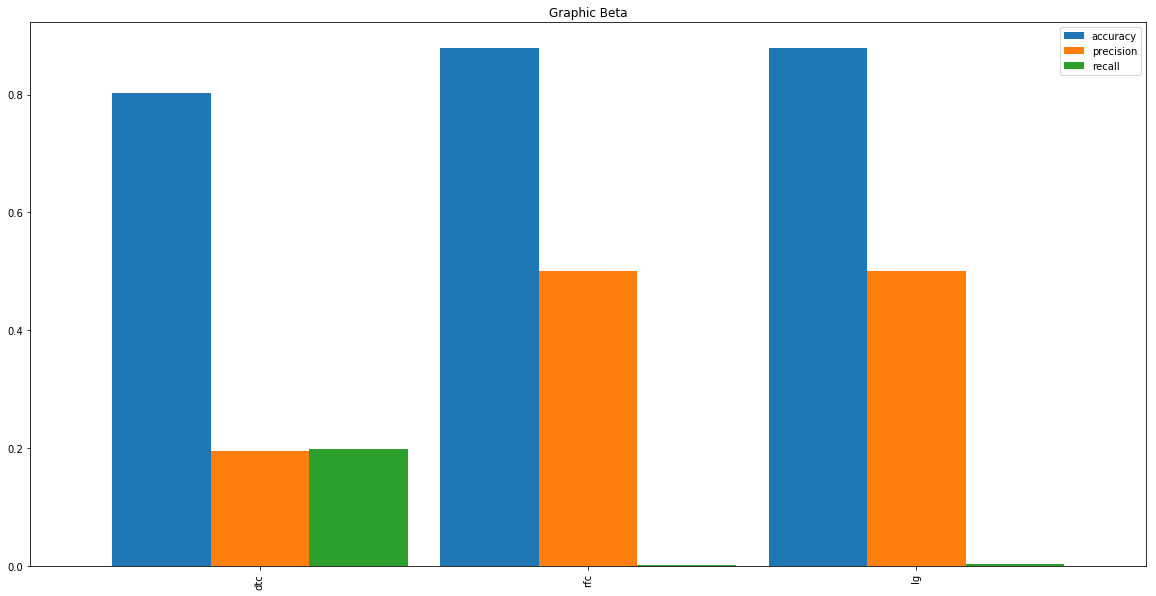

In [464]:
# Визуализировать эти метрики всех моделей на одном графике (чтоб визуально посмотреть)
draw_plot(y_test, 
          predicts, 
          title="Graphic Beta")
# Ваш код :-)

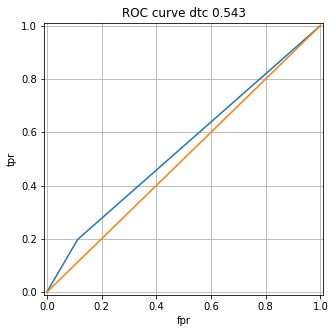

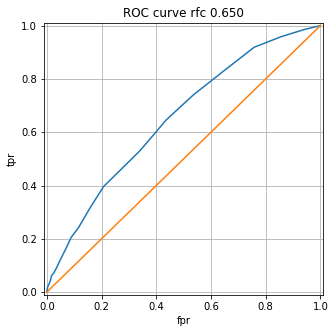

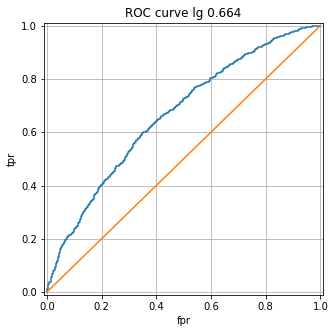

In [465]:
# Потроить roc-кривые всех моделей на одном графике
# Вывести roc_auc каждой моделе
draw_roc(y_test, predict_prob_dtc, "dtc")
draw_roc(y_test, predict_prob_rfc, "rfc")
draw_roc(y_test, predict_prob_lg, "lg")

In [466]:
from sklearn.cross_validation import cross_val_score
# Сделать k-fold (10 фолдов) кросс-валидацию каждой модели
# И посчитать средний roc_auc
def calc_cross_val(train, target, model):
    scores = cross_val_score(
        model,
        train,
        target,
        scoring='roc_auc',
        cv=10
    )
    return scores 
# Ваш код :-)

In [467]:
values = {}
scores = calc_cross_val(data_train, y, RandomForestClassifier(n_estimators = 50))
values["RandomForestClassifier"] = scores.mean()
scores = calc_cross_val(data_train, y, DecisionTreeClassifier(random_state=42))
values["DecisionTreeClassifier"] = scores.mean()
scores = calc_cross_val(data_train, y, LogisticRegression(penalty='l1', tol=0.01))
values["LogisticRegression"] = scores.mean()

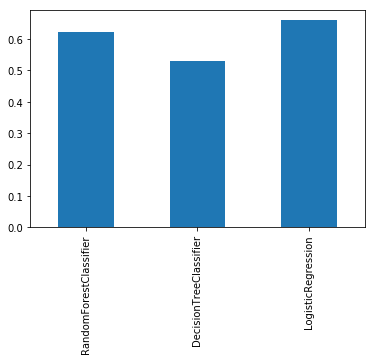

In [468]:
# scores.mean()
pd.DataFrame.from_dict(data=values, orient='index').plot(kind='bar', legend=False)

In [469]:
# Взять лучшую модель и сделать predict (с вероятностями (!!!)) для test выборки

#precision, recall, thresholds = precision_recall_curve(y_test, predict_prob_rfc[:1])
# Ваш код :-)